In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
training_set=pd.read_csv('BTCtrain.csv')   #reading csv file
training_set.head()			   #print first five rows 不給參數就自動印出前五行

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [47]:
training_set1=training_set.iloc[:,1:2] 	   #全部,selecting the second column Open的數據
training_set1.head()			   #print first five rows

,Open
0,0.04951
1,0.04951
2,0.08584
3,0.08080
4,0.07474


In [48]:
training_set1=training_set1.values	   #converting to 2d array 把training_set1的數據轉變為一個array方便後面使用
training_set1				   #print the whole data

array([[  4.95100000e-02],
       [  4.95100000e-02],
       [  8.58400000e-02],
       ..., 
       [  9.90604004e+03],
       [  9.84804981e+03],
       [  9.94708008e+03]])

In [49]:
sc = MinMaxScaler()			   #scaling using normalisation
training_set1 = sc.fit_transform(training_set1) #從0到1重新排列
training_set1

array([[  0.00000000e+00],
       [  0.00000000e+00],
       [  3.65234627e-06],
       ..., 
       [  9.95874142e-01],
       [  9.90044238e-01],
       [  1.00000000e+00]])

In [50]:
xtrain=training_set1[0:2694]		   #input values of rows [0-2694] 
xtrain

array([[  0.00000000e+00],
       [  0.00000000e+00],
       [  3.65234627e-06],
       ..., 
       [  9.78440783e-01],
       [  9.95874142e-01],
       [  9.90044238e-01]])

In [51]:
ytrain=training_set1[1:2695]		   #input values of rows [1-2695] 
ytrain

array([[  0.00000000e+00],
       [  3.65234627e-06],
       [  3.14566240e-06],
       ..., 
       [  9.95874142e-01],
       [  9.90044238e-01],
       [  1.00000000e+00]])

In [53]:
xtrain = np.reshape(xtrain, (2694, 1, 1)) #為了LSTM固定的格式 bashsize,timestamp,dimension
xtrain

array([[[  0.00000000e+00]],

       [[  0.00000000e+00]],

       [[  3.65234627e-06]],

       ..., 
       [[  9.78440783e-01]],

       [[  9.95874142e-01]],

       [[  9.90044238e-01]]])

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor=Sequential()			#initialize the RNN 宣告一個空的model

regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))			#adding input layerand the LSTM layer

regressor.add(Dense(units=1))		#adding output layers return value

regressor.compile(optimizer='adam',loss='mean_squared_error') 		#compiling the RNN adam = gradient decent的方法 

regressor.fit(xtrain,ytrain,batch_size=32,epochs=50) #我後面會有真實的RNN訓練

Epoch 1/50
2694/2694 [==============================] - 1s - loss: 0.0776     
Epoch 2/50
2694/2694 [==============================] - 0s - loss: 0.0270     
Epoch 3/50
2694/2694 [==============================] - 0s - loss: 0.0153     
Epoch 4/50
2694/2694 [==============================] - 0s - loss: 0.0136     
Epoch 5/50
2694/2694 [==============================] - 0s - loss: 0.0132     
Epoch 6/50
2694/2694 [==============================] - 0s - loss: 0.0130     
Epoch 7/50
2694/2694 [==============================] - 0s - loss: 0.0128     
Epoch 8/50
2694/2694 [==============================] - 0s - loss: 0.0126     
Epoch 9/50
2694/2694 [==============================] - 0s - loss: 0.0124     
Epoch 10/50
2694/2694 [==============================] - 0s - loss: 0.0122     
Epoch 11/50
2694/2694 [==============================] - 0s - loss: 0.0119     
Epoch 12/50
2694/2694 [==============================] - 0s - loss: 0.0117     
Epoch 13/50
2694/2694 [==========================

In [55]:
test_set = pd.read_csv('BTCtest.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,9947.080078,10942.799805,9420.929688,10861.469727,10861.469727,1353669597
1,2017-12-02,10861.469727,11175.230469,10715.549805,10912.730469,10912.730469,950474241
2,2017-12-03,10912.719727,11851.089844,10578.429688,11246.209961,11246.209961,1380012064
3,2017-12-04,11244.200195,11624.629883,10917.809570,11623.910156,11623.910156,1057859226
4,2017-12-05,11624.370117,11901.870117,11486.129883,11667.129883,11667.129883,1048839303


In [56]:
real_stock_price = test_set.iloc[:,1:2]		#selecting the second column
real_stock_price = real_stock_price.values	#converting to 2D array
real_stock_price

array([[  9947.080078],
       [ 10861.469727],
       [ 10912.719727],
       [ 11244.200195],
       [ 11624.370117],
       [ 11667.129883],
       [ 13750.089844],
       [ 16867.980469]])

In [57]:
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (8, 1, 1))
inputs

array([[[ 1.        ]],

       [[ 1.09192589]],

       [[ 1.09707818]],

       [[ 1.13040275]],

       [[ 1.16862219]],

       [[ 1.17292093]],

       [[ 1.38232614]],

       [[ 1.69577552]]])

In [58]:
predicted_stock_price = regressor.predict(inputs) #透過之前做好的RNN來做predict
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #從0到1還原到真正的價格
predicted_stock_price

array([[  9568.60644531],
       [  9992.37988281],
       [  9994.52246094],
       [ 10007.61328125],
       [ 10021.09570312],
       [ 10022.515625  ],
       [ 10073.40136719],
       [ 10108.27148438]], dtype=float32)

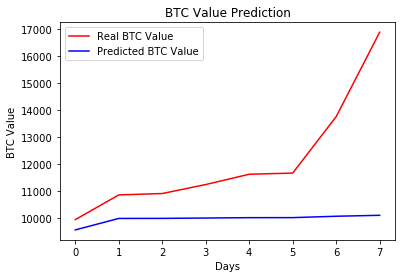

In [59]:
plt.plot(real_stock_price, color = 'red', label = 'Real BTC Value')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BTC Value')
plt.title('BTC Value Prediction')
plt.xlabel('Days')
plt.ylabel('BTC Value')
plt.legend()
plt.show()